In [1]:
library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library('RColorBrewer')
library('dplyr')
library('reshape2')
library('IRdisplay')
source('../../../src/tools.R')     # custom tools function
#source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
library(scales)
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

Run citation('hdp') for citation instructions,
    and file.show(system.file('LICENSE', package='hdp')) for license details.

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [36]:
read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")[,156:15]

ERROR: Error in `[.data.frame`(read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv"), : undefined columns selected


In [50]:
df_final <- read.table("../../../data/updated_dataset/modif_final.csv",sep = ',' , header = T)
rownames(df_final)<- df_final$data_pd
df_final <- df_final[,-1:-3]

#df_final <-
#head(data.frame(read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")))
df_final <- merge(df_final,read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")[,156:157],by=0)
df_final <- df_final[,-1]
df_final <- df_final[,-length(colnames(df_final))]
#df_final <- df_final[,2:length(colnames(df_final))-1]
head(df_final)

ASXL1 ASXL2 ASXL3 ATRX BAGE3 BCOR BRAF CBFB CBL CDKN2A CEBPA_bi CEBPA_mono
1 0     0     0     0    0     0    0    0    0   0      0        1         
2 0     0     0     0    0     0    0    0    0   0      0        1         
3 0     0     0     0    0     0    0    0    0   0      0        0         
4 0     0     0     0    0     1    0    0    0   0      0        0         
5 1     0     0     0    0     0    0    0    0   0      0        0         
6 0     0     0     0    0     0    0    0    0   0      0        0         
  CNTN5 CREBBP CSF1R CSF3R CTCF CUL2 CUX1 DNMT3A EED ETV6 EZH2 FBXW7 ITD
1 0     0      0     0     0    0    0    1      0   0    0    0     1  
2 0     0      0     0     0    0    0    0      0   0    0    0     0  
3 0     0      0     0     0    0    0    1      0   0    0    0     1  
4 0     0      0     0     0    0    0    1      0   0    0    0     0  
5 0     0      0     0     0    0    0    0      0   0    0    0     0  
6 0     0      0     0     0    0    0    0      0   0    1    0     0  
  FLT3_TKD FLT3_other GATA1 GATA2 GNAS GNB1 IDH1 IDH2_p.R140 IDH2_p.R172 JAK2
1 0        0          0     0     0    0    0    0           0           0   
2 0        0          0     0     0    0    0    0           0           0   
3 1        0          0     0     0    0    0    0           0           0   
4 0        0          0     0     0    0    0    0           0           0   
5 0        0          0     0     0    0    0    0           0           0   
6 0        0          0     0     0    0    0    0           0           0   
  JAK3 KANSL1 KDM6A KIT KMT2C KMT2D KMT2E KRAS LUC7L2 MED12 MLL MPL MYC NF1
1 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
2 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
3 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
4 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
5 0    0      0     0   0     0     0     1    0      0     0   0   0   0  
6 0    0      0     0   0     0     0     0    0      0     0   0   0   0  
  NFE2 NOTCH1 NPM1 NRAS_other NRAS_p.G12_13 NRAS_p.Q61_62 PDS5B PHF6 PPFIA2
1 0    0      1    0          0             0             0     0    0     
2 0    0      0    0          1             0             0     0    0     
3 0    0      1    0          0             0             0     0    0     
4 0    0      0    0          0             0             0     0    0     
5 0    0      0    0          0             1             0     0    0     
6 0    0      0    0          0             0             0     1    0     
  PRPF8 PTEN PTPN11 PTPRF PTPRT RAD21 RIT1 RUNX1 S100B SETBP1 SF1 SF3B1 SMC1A
1 0     0    0      0     0     0     0    0     0     0      0   0     0    
2 0     0    0      0     0     0     0    0     0     0      0   0     0    
3 0     0    0      0     0     0     0    0     0     0      0   0     0    
4 0     0    0      0     0     0     0    0     0     0      0   0     0    
5 0     0    0      0     0     0     0    1     0     0      0   0     0    
6 0     0    1      0     0     0     0    1     0     0      0   0     0    
  SMC3 SMG1 SPP1 SRSF2 STAG2 STAT5B SUZ12 TET2 TP53 U2AF1 WT1 ZRSR2 add_8
1 0    0    0    0     0     0      0     1    0    0     0   0     0    
2 0    0    0    0     0     0      0     0    0    0     0   0     1    
3 0    0    0    0     0     0      0     0    0    0     0   0     0    
4 0    0    0    0     0     0      0     0    1    0     0   0     0    
5 0    0    0    1     1     0      0     1    0    0     0   0     1    
6 0    0    0    0     0     0      0     0    0    0     0   1     0    
  add_11 add_13 add_21 add_22 del_20 del_3 del_5 del_7 del_9 del_12 del_13
1 0      0      0      0      0      0     0     0     0     0      0     
2 0      0      0      0      0      0     0     0     0     0      0     
3 0      0      0      0      0      0     0     0   

In [51]:
#100*colSums(df_final)/dim(df_final)[1]
dim(df_final)

[1] 2094  152

In [52]:
launch <- function(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab){
    number_of_chains <- chains
    chain_list <- vector('list', number_of_chains)
    hdp <- initialise_hdp_yanis(data = data,hh=base_dist,alphaa = aa,alphab= ab)


    for (i in 1:number_of_chains) {
        seed <- i * 100
        print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))

        # run single hdp chain
        chain_list[[i]] <- activate_and_run_hdp(hdp,
                                                initcc = initial_clusters,
                                                burnin = burn,
                                                n      = posterior_samples,
                                                space  = 20,
                                                seed   = seed)
        print_and_flush('\n')
    }

    multi_output <- hdp_multi_chain(chain_list)
    print(multi_output)
}

In [53]:

num_cols = ncol(df_final)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1))/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

binomial <- unlist(sapply(df_final,bin))
gaussian <- unlist(sapply(df_final,normal))
pois <- as.numeric(unlist(sapply(df_final,poisson)))
unif <- unlist(sapply(df_final,equally))
repetition <- unlist(sapply(df_final,repet))
lists<- list(binomial,gaussian,unif,repetition)


In [54]:
data <- df_final
posterior_samples <- 250
initial_clusters <- 17
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 2
ab <-0.5

# I) Initial Component : Component 0 to 10

In [55]:
multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)

Initialise HDP on a 2094 x 152 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2095 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

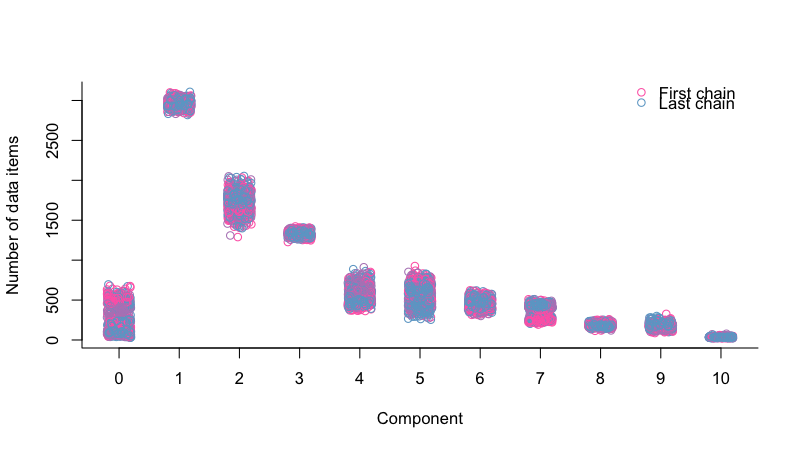

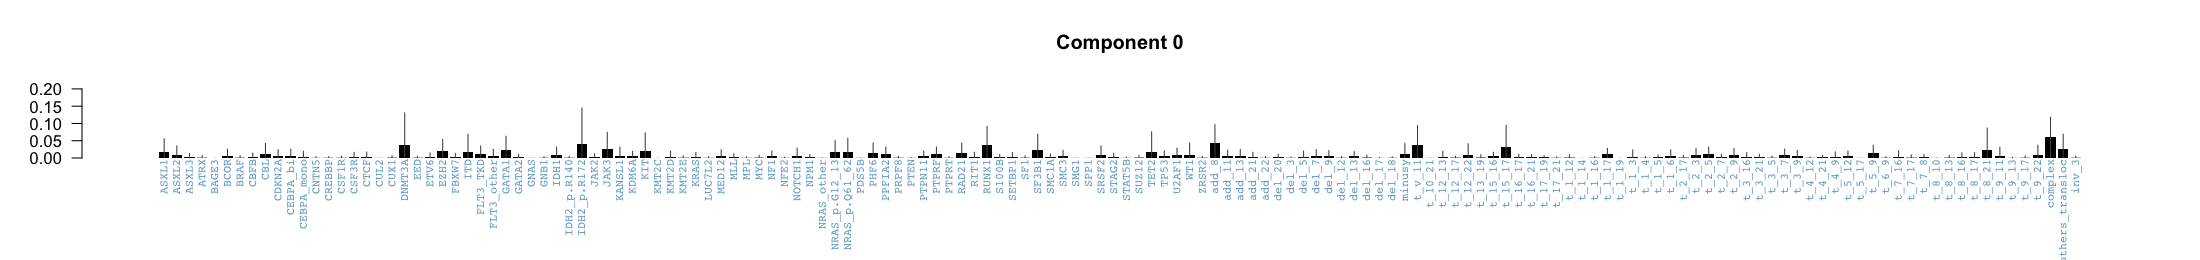

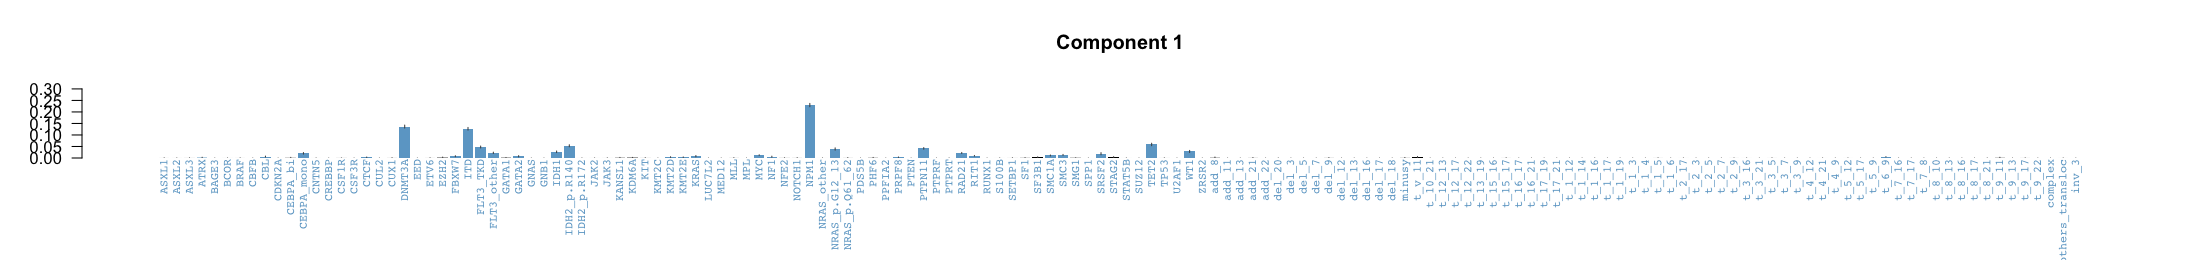

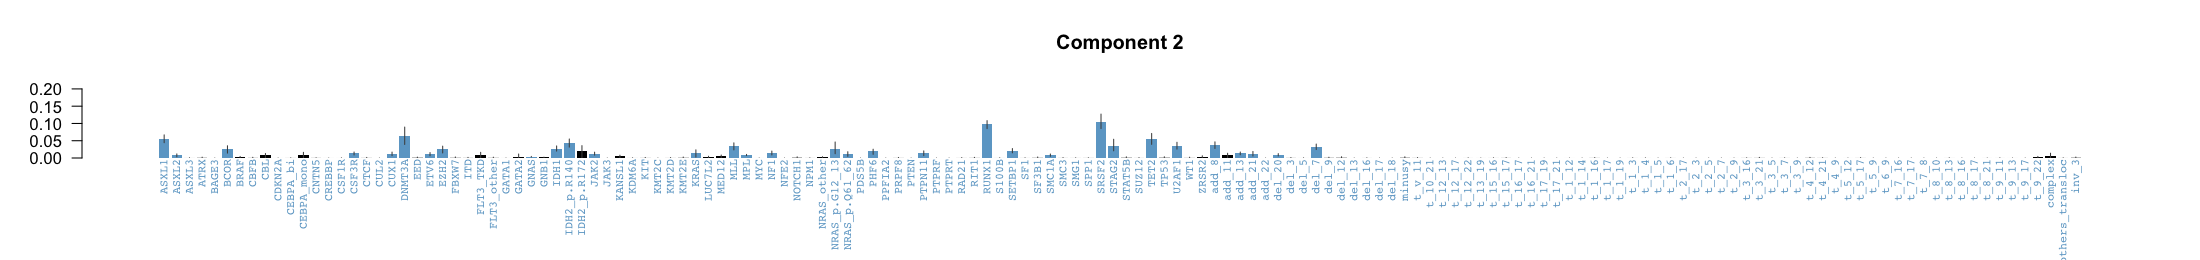

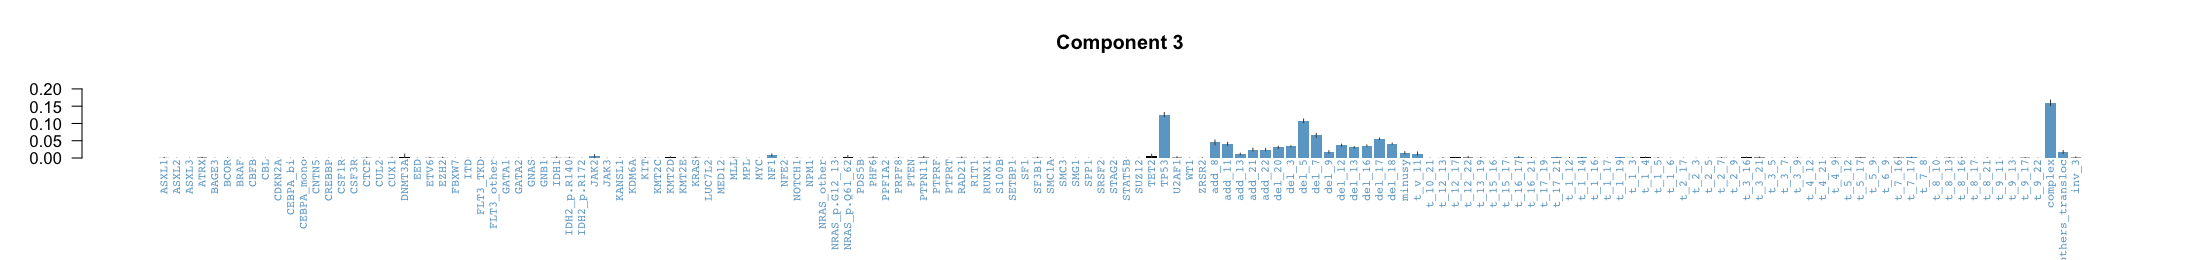

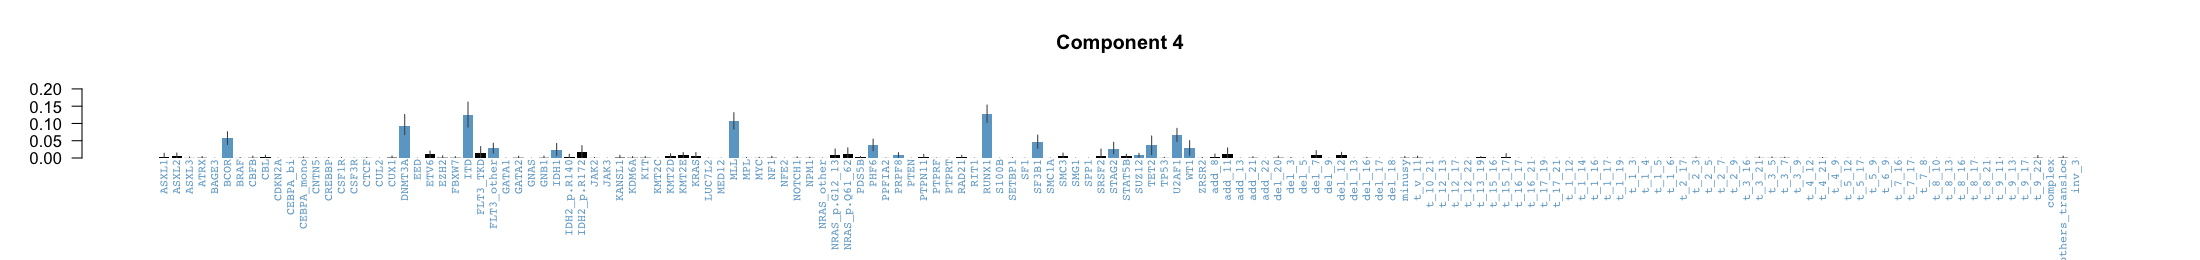

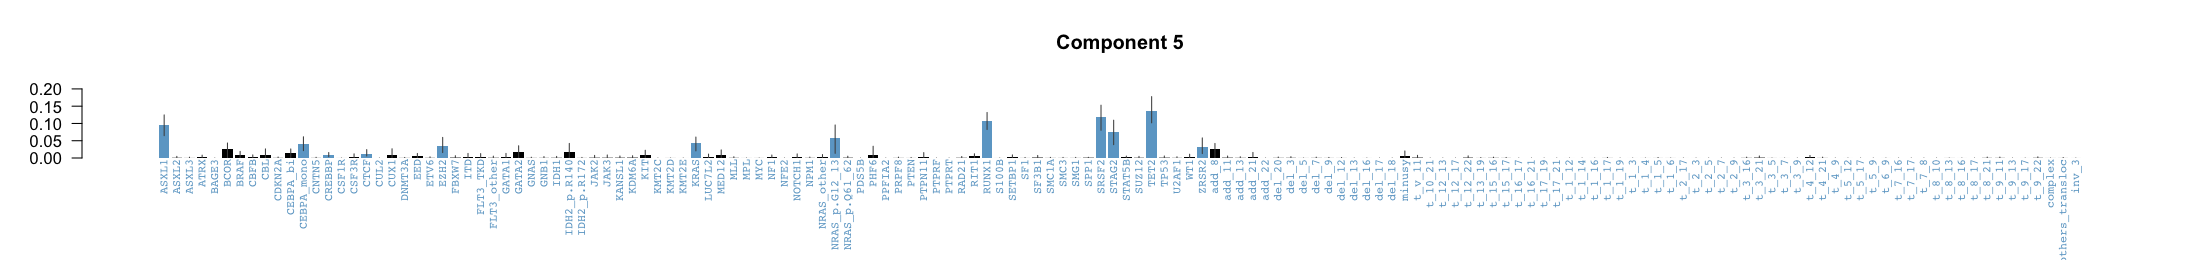

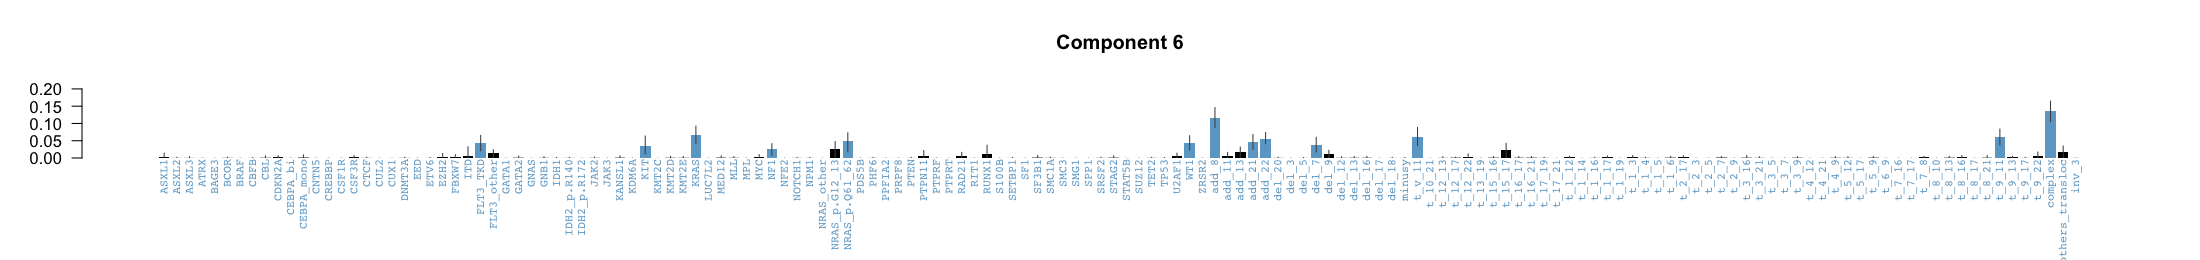

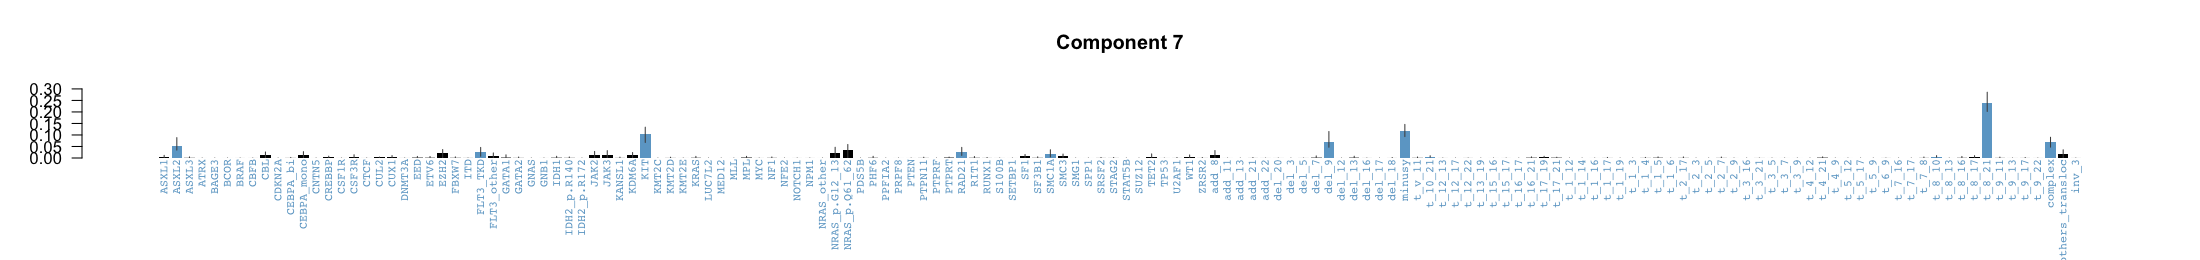

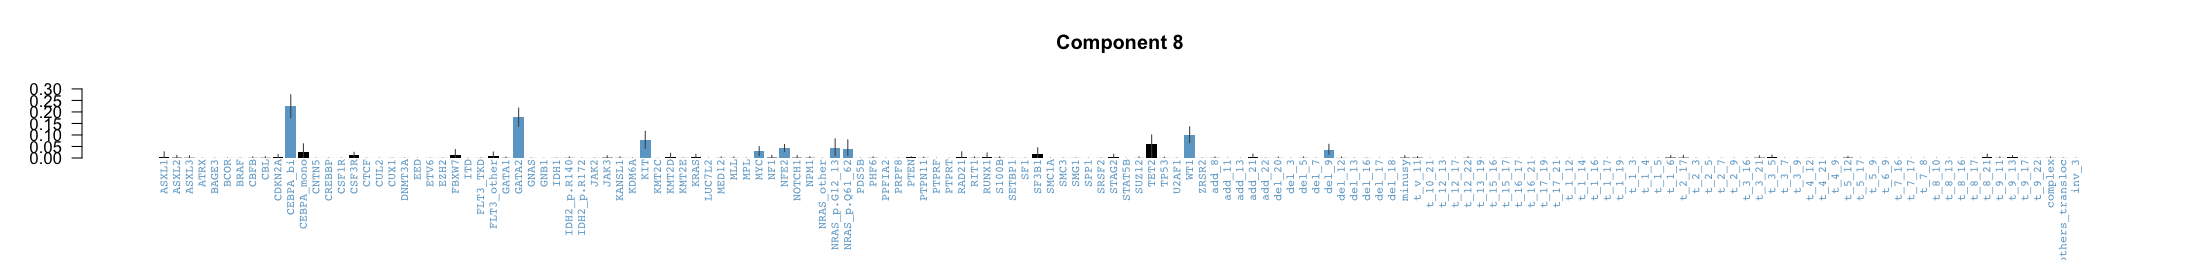

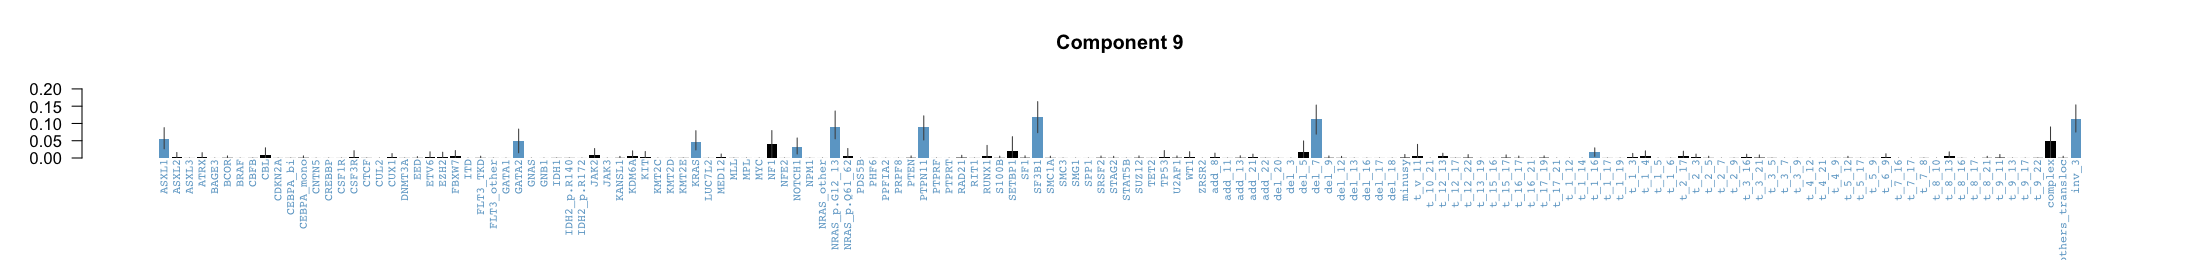

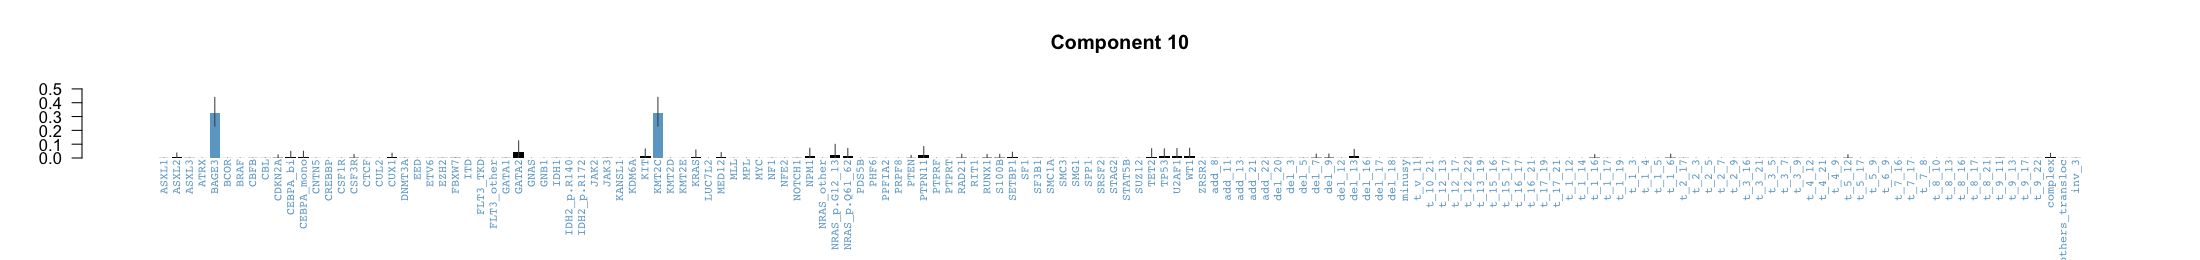

In [56]:
#plot_category_distribution_by_component(multi_output_cluster_10, colnames(df_final))
plot_components_size(multi_output_cluster_10,8,4.5)
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                                         )

Number of components: 10
Number of NA rows   : 0


values      count freq             
2  1            852  40.6876790830946 
3  2            438  20.9169054441261 
4  3            223  10.6494746895893 
7  6            144  6.87679083094556 
8  7            129  6.16045845272206 
5  4            114  5.44412607449857 
6  5             84  4.01146131805158 
9  8             47  2.24450811843362 
10 9             34  1.62368672397326 
1  0             23  1.09837631327603 
11 10             6  0.286532951289398
12 -- total -- 2094  100%

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


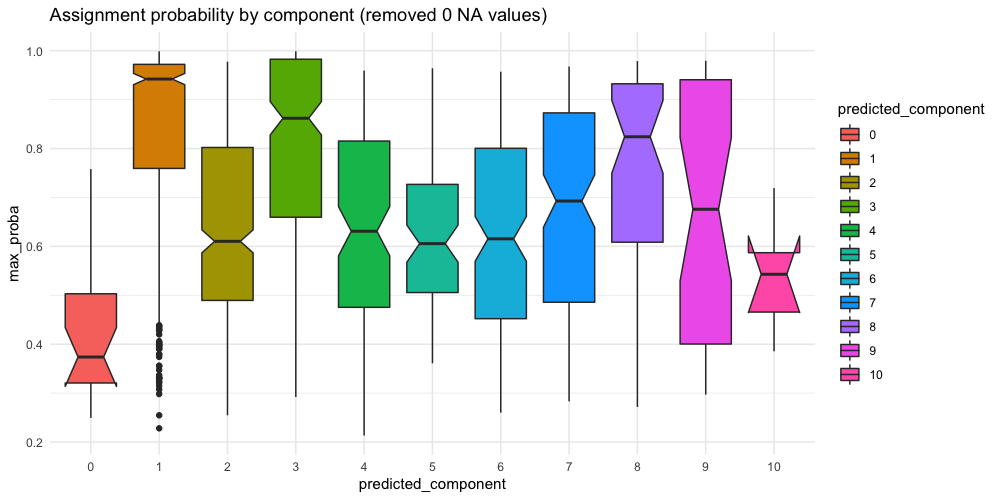

In [59]:
dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_10_components)

#### People assigned to NaN have no genetic and cytogenetic events (sum=0). We remove them from the analysis

In [21]:
initial_components <- cbind(df_final,dd_predicted_10_components)
initial_components[initial_components$inv_3==1,]


ASXL1 ASXL2 ASXL3 ATRX BAGE3 BCOR BRAF CBFB CBL CDKN2A CEBPA_bi
PD14911a 0     0     0     0    0     0    0    0    0   0      0       
PD14993a 0     0     0     0    0     0    0    0    0   0      0       
PD15174a 0     0     0     0    0     0    0    0    0   0      0       
PD15291a 0     0     0     0    0     0    0    0    0   0      0       
PD15447c 0     0     0     0    0     0    0    0    0   0      0       
PD19659a 1     0     0     0    0     0    0    0    0   0      0       
PD19785c 0     0     0     0    0     0    0    0    0   0      0       
PD19811c 0     0     0     0    0     0    0    0    0   0      0       
PD20112a 0     0     0     0    1     0    0    0    0   0      0       
PD20180c 1     0     0     0    0     0    0    0    0   0      0       
PD20274a 0     0     0     0    0     0    0    0    0   0      0       
PD22582a 0     1     0     0    0     0    0    0    0   0      0       
PD22615c 0     0     0     0    0     0    0    0    0   0      0       
PD22769c 0     0     0     0    0     0    0    0    0   0      0       
PD22835a 1     0     0     0    0     0    0    0    0   0      0       
PD22938c 0     0     0     0    0     0    0    0    0   0      0       
PD23184a 0     0     0     0    0     0    0    0    0   0      0       
PD23240c 0     0     0     0    0     0    0    0    0   0      0       
PD25031a 0     0     0     0    0     0    0    0    0   0      0       
PD25236c 1     0     0     0    0     0    0    0    0   0      0       
PD25243c 0     0     0     0    0     0    0    0    0   0      0       
PD25445a 0     0     0     0    0     0    0    0    0   0      0       
         CEBPA_mono CNTN5 CREBBP CSF1R CSF3R CTCF CUL2 CUX1 DNMT3A EED ETV6
PD14911a 0          0     0      0     0     0    0    0    0      0   0   
PD14993a 0          0     0      0     0     0    0    1    0      0   0   
PD15174a 0          0     0      0     0     0    0    0    0      0   0   
PD15291a 0          0     0      0     0     0    0    0    0      0   0   
PD15447c 0          0     0      0     0     0    0    0    0      0   0   
PD19659a 0          0     0      0     0     0    0    0    0      0   0   
PD19785c 0          0     0      0     0     0    0    0    0      0   0   
PD19811c 0          0     0      0     0     0    0    0    0      0   0   
PD20112a 0          0     0      0     0     0    0    0    0      0   0   
PD20180c 0          0     0      0     0     0    0    0    0      0   0   
PD20274a 0          0     0      0     0     0    0    0    0      0   0   
PD22582a 0          0     0      0     1     0    0    0    0      0   0   
PD22615c 0          0     0      0     0     0    0    0    0      0   0   
PD22769c 0          0     0      0     0     0    0    0    0      0   0   
PD22835a 0          0     0      0     0     0    0    0    0      0   0   
PD22938c 0          0     0      0     0     0    0    0    0      0   0   
PD23184a 0          0     0      0     0     0    0    0    0      0   1   
PD23240c 0          0     0      0     0     0    0    0    0      0   0   
PD25031a 0          0     0      0     0     0    0    0    0      0   0   
PD25236c 0          0     0      0     0     0    0    0    0      0   0   
PD25243c 0          0     0      0     0     0    0    0    0      0   0   
PD25445a 0          0     0      0     0     0    0    0    0      0   0   
         EZH2 FBXW7 ITD FLT3_TKD FLT3_other GATA1 GATA2 GNAS GNB1 IDH1
PD14911a 0    0     0   0        0          0     0     0    0    0   
PD14993a 0    0     0   0        0          0     0     0    0    0   
PD15174a 0    0     0   0        0          0     0     0    0    0   
PD15291a 0    0     0   0        0          0     0     0    0    0   
PD15447c 0    0     0   0        0          0     0     0    0    0   
PD19659a 0    0     0   0        0          0     1     0    0    0   
PD19785c 0    0     0   0        0          0     0     0    0    0   
PD19811c 0    

##### Create a dataframe with initial patients and their initial component (without NAN patients)

In [13]:

#write.table(initial_components,file="initial_components_with_proba.tsv",sep='\t')

# Let's remove component 0,2 and 4 and NaN and rename component : component 1 to 8.

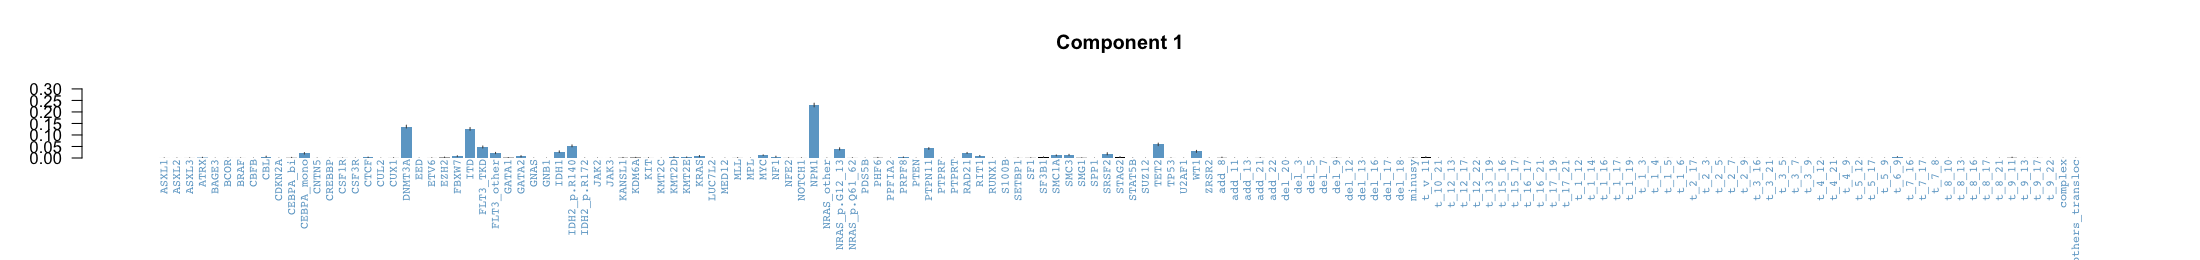

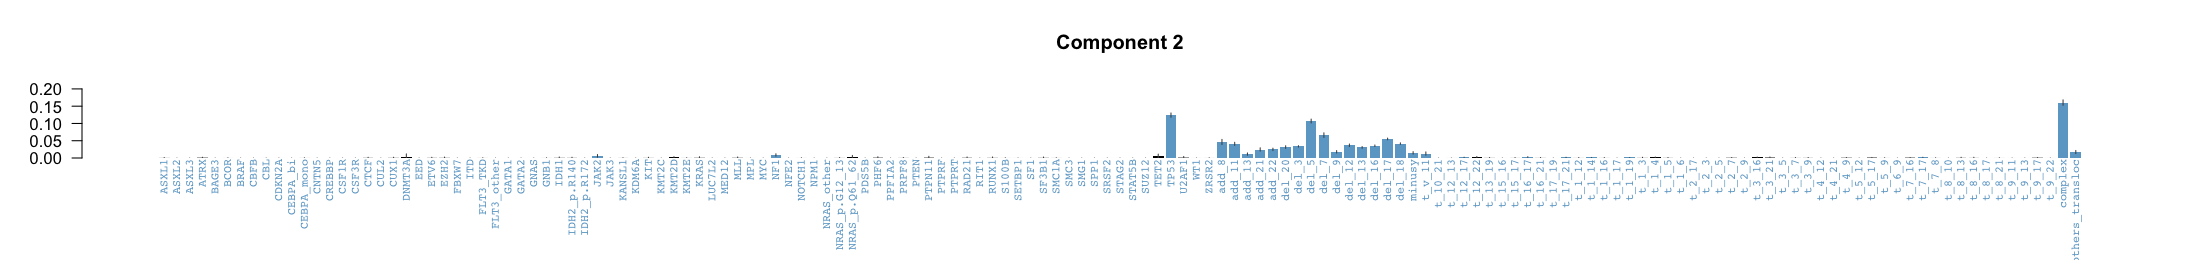

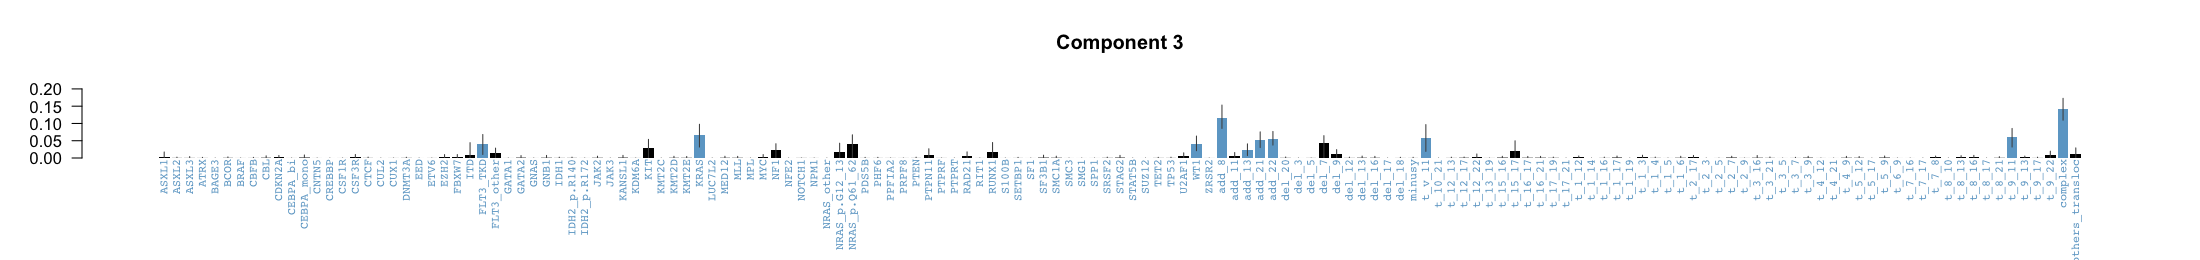

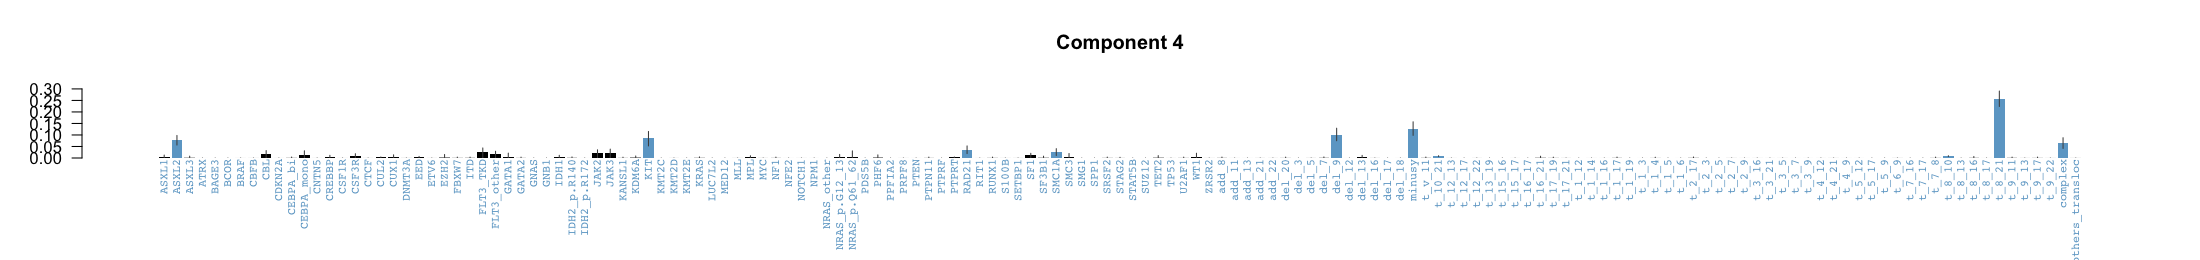

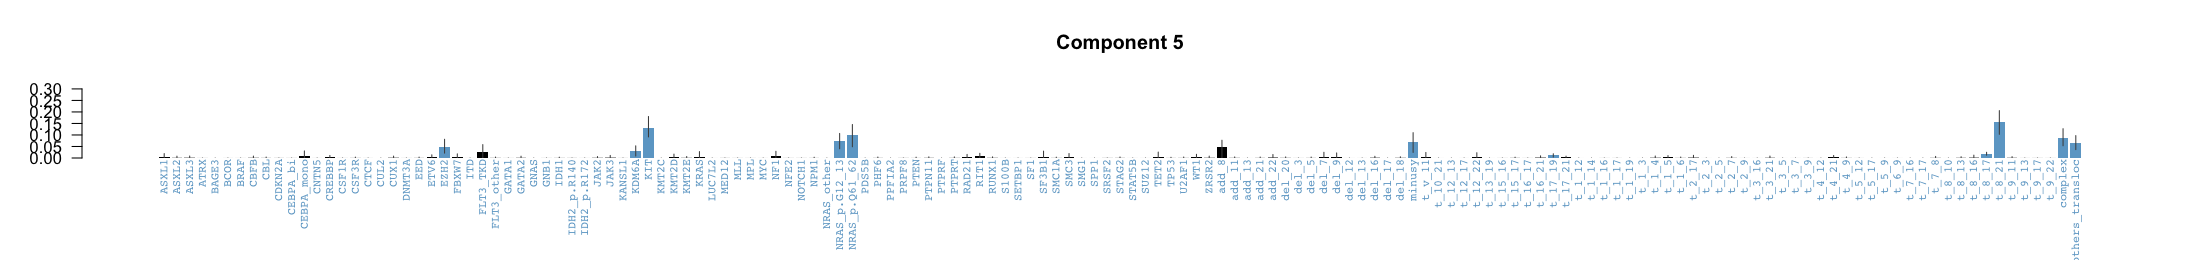

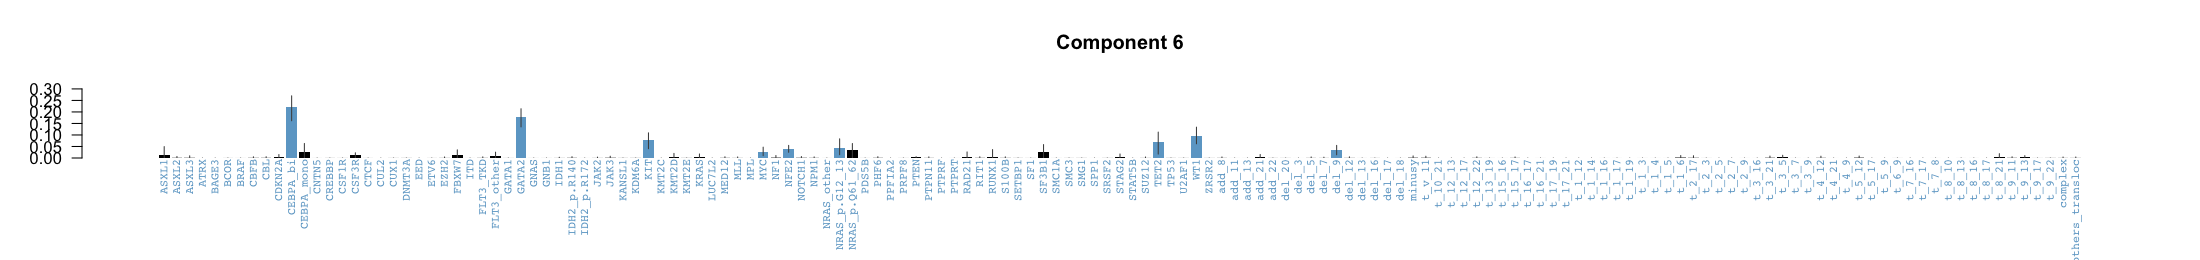

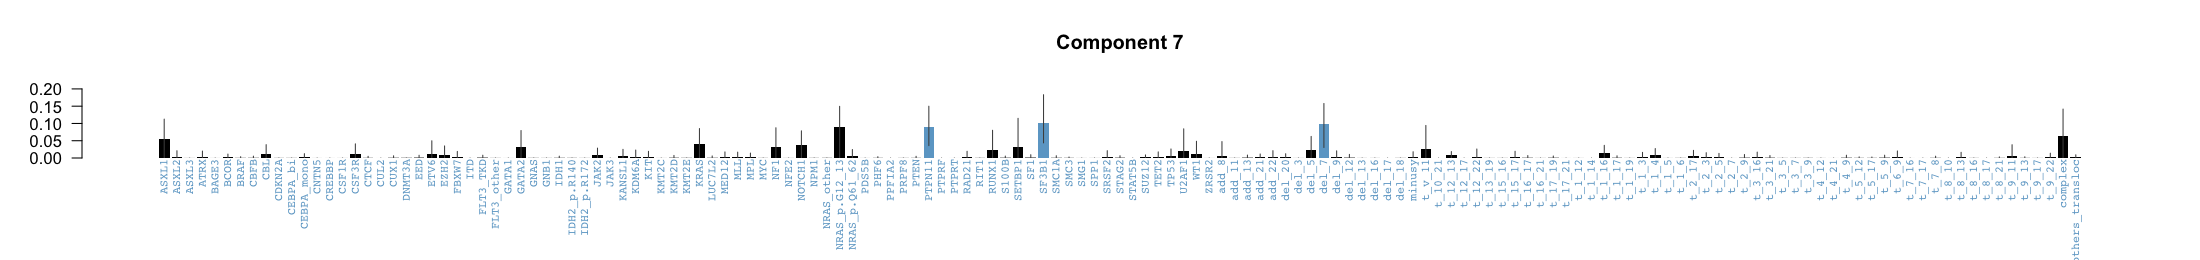

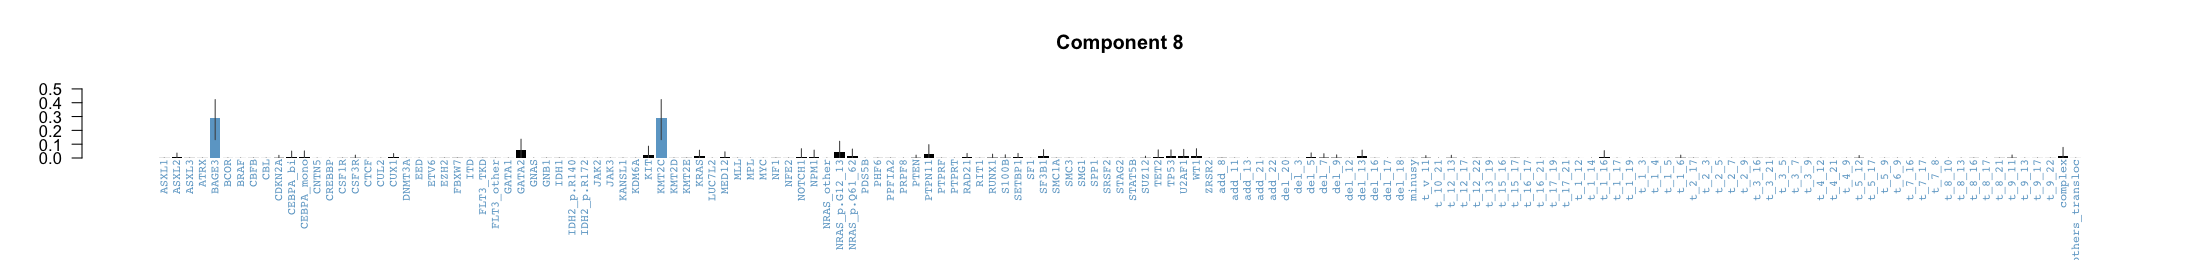

In [16]:
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                    comp=c(1,3,5,6,7,8,9,10),
                    plot_title=c("Component 1","Component 2","Component 3","Component 4","Component 5","Component 6","Component 7","Component 8")
                                         )

In [17]:
t <- read.table("initial_components_with_proba.tsv")
read.table("../fall_components_with_second_complex_inv3.tsv")

[1] "ASXL1"               "ASXL2"               "ASXL3"              
  [4] "ATRX"                "BAGE3"               "BCOR"               
  [7] "BRAF"                "CBFB"                "CBL"                
 [10] "CDKN2A"              "CEBPA_bi"            "CEBPA_mono"         
 [13] "CNTN5"               "CREBBP"              "CSF1R"              
 [16] "CSF3R"               "CTCF"                "CUL2"               
 [19] "CUX1"                "DNMT3A"              "EED"                
 [22] "ETV6"                "EZH2"                "FBXW7"              
 [25] "ITD"                 "FLT3_TKD"            "FLT3_other"         
 [28] "GATA1"               "GATA2"               "GNAS"               
 [31] "GNB1"                "IDH1"                "IDH2_p.R140"        
 [34] "IDH2_p.R172"         "JAK2"                "JAK3"               
 [37] "KANSL1"              "KDM6A"               "KIT"                
 [40] "KMT2C"               "KMT2D"               "KMT2E"              
 [43] "KRAS"                "LUC7L2"              "MED12"              
 [46] "MLL"                 "MPL"                 "MYC"                
 [49] "NF1"                 "NFE2"                "NOTCH1"             
 [52] "NPM1"                "NRAS_other"          "NRAS_p.G12_13"      
 [55] "NRAS_p.Q61_62"       "PDS5B"               "PHF6"               
 [58] "PPFIA2"              "PRPF8"               "PTEN"               
 [61] "PTPN11"              "PTPRF"               "PTPRT"              
 [64] "RAD21"               "RIT1"                "RUNX1"              
 [67] "S100B"               "SETBP1"              "SF1"                
 [70] "SF3B1"               "SMC1A"               "SMC3"               
 [73] "SMG1"                "SPP1"                "SRSF2"              
 [76] "STAG2"               "STAT5B"              "SUZ12"              
 [79] "TET2"                "TP53"                "U2AF1"              
 [82] "WT1"                 "ZRSR2"               "add_8"              
 [85] "add_11"              "add_13"              "add_21"             
 [88] "add_22"              "del_20"              "del_3"              
 [91] "del_5"               "del_7"               "del_9"              
 [94] "del_12"              "del_13"              "del_16"             
 [97] "del_17"              "del_18"              "minusy"             
[100] "t_v_11"              "t_10_21"             "t_12_13"            
[103] "t_12_17"             "t_12_22"             "t_13_19"            
[106] "t_15_16"             "t_15_17"             "t_16_17"            
[109] "t_16_21"             "t_17_19"             "t_17_21"            
[112] "t_1_12"              "t_1_14"              "t_1_16"             
[115] "t_1_17"              "t_1_19"              "t_1_3"              
[118] "t_1_4"               "t_1_5"               "t_1_6"              
[121] "t_2_17"              "t_2_3"               "t_2_5"              
[124] "t_2_7"               "t_2_9"               "t_3_16"             
[127] "t_3_21"              "t_3_5"               "t_3_7"              
[130] "t_3_9"               "t_4_12"              "t_4_21"             
[133] "t_4_9"               "t_5_12"              "t_5_17"             
[136] "t_5_9"               "t_6_9"               "t_7_16"             
[139] "t_7_17"              "t_7_8"               "t_8_10"             
[142] "t_8_13"              "t_8_16"              "t_8_17"             
[145] "t_8_21"              "t_9_11"              "t_9_13"             
[148] "t_9_17"              "t_9_22"              "complex"            
[151] "others_transloc"     "component_0"         "component_1"        
[154] "component_2"         "component_3"         "component_4"        
[157] "component_5"         "component_6"         "component_7"        
[160] "component_8"         "component_9"         "component_10"       
[163] "predicted_component" "max_proba"

# II- HDP reapplied ONLY on component 0 , 2 and 4

##### We have finally decided to keep the HDP leading to 10 components. We will isolate component 0, 2 and 4 and reapply a new optimised HDP clustering on them.

Let's work on people in cluster 0,2 and 4

In [26]:
df_clustered_10_c <- cbind(df_final, dd_predicted_10_components)
df_to_recluster <- df_clustered_10_c[df_clustered_10_c$predicted_component==0 | df_clustered_10_c$predicted_component==2 | df_clustered_10_c$predicted_component==4,]
df_to_recluster <- df_to_recluster[,1:151]  # to keep only columns representing features ( we get rid of the proba components)
df_to_recluster <- na.omit(df_to_recluster)

In [86]:
paste("Number of people in component 0,2 and 4 : ",dim(df_to_recluster)[1],"")
for (i in c(0,2,4))
    print(paste("Number of people in component ",sep=paste(i,":"," "),dim(df_clustered_10_c[df_clustered_10_c$predicted_component==i,])[1] ))

[1] "Number of people in component 0,2 and 4 :  658 "

[1] "Number of people in component 0 :  25"
[1] "Number of people in component 2 :  453"
[1] "Number of people in component 4 :  180"


In [28]:
num_cols = ncol(df_to_recluster[colSums(df_to_recluster) > 0])  ## keep only column that have at least a mutation
num_cols
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

binomial <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],bin))
gaussian <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],normal))
pois <- as.numeric(unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],poisson)))
unif <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],equally))

[1] 115

In [ ]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 5
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 1
ab <-1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)


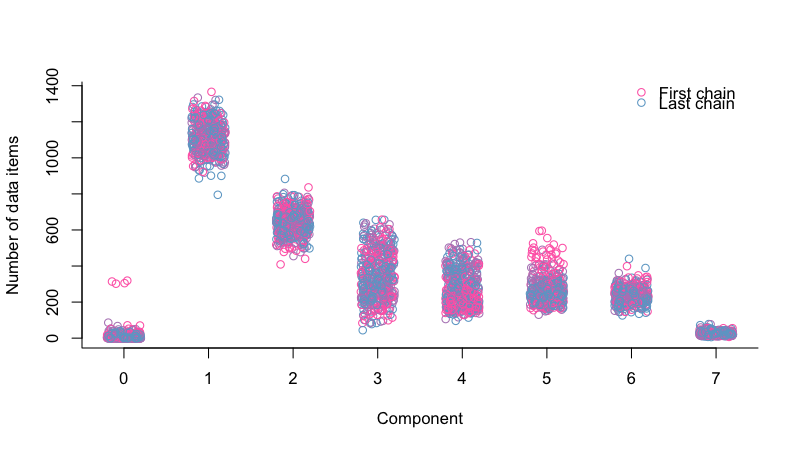

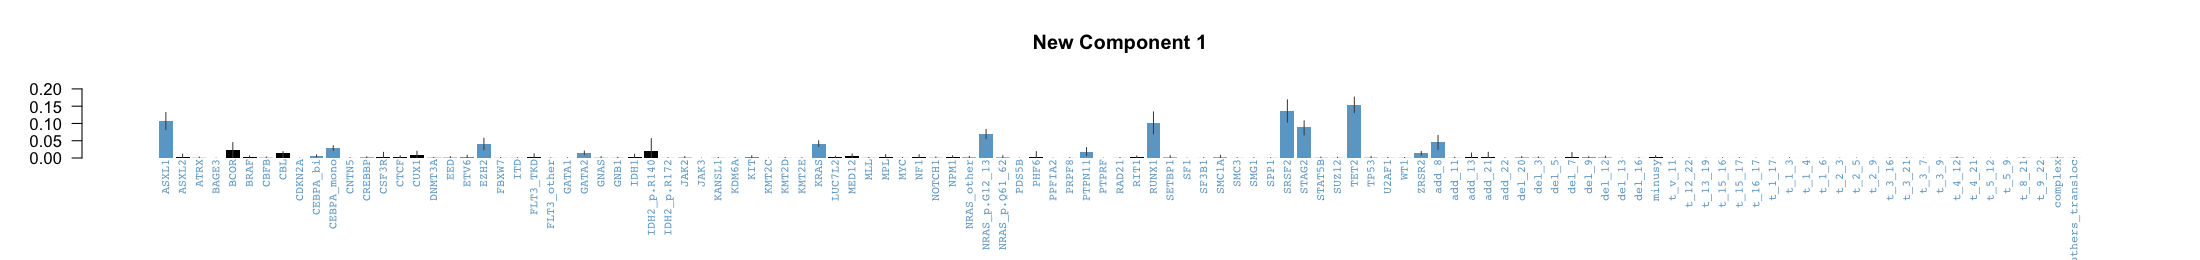

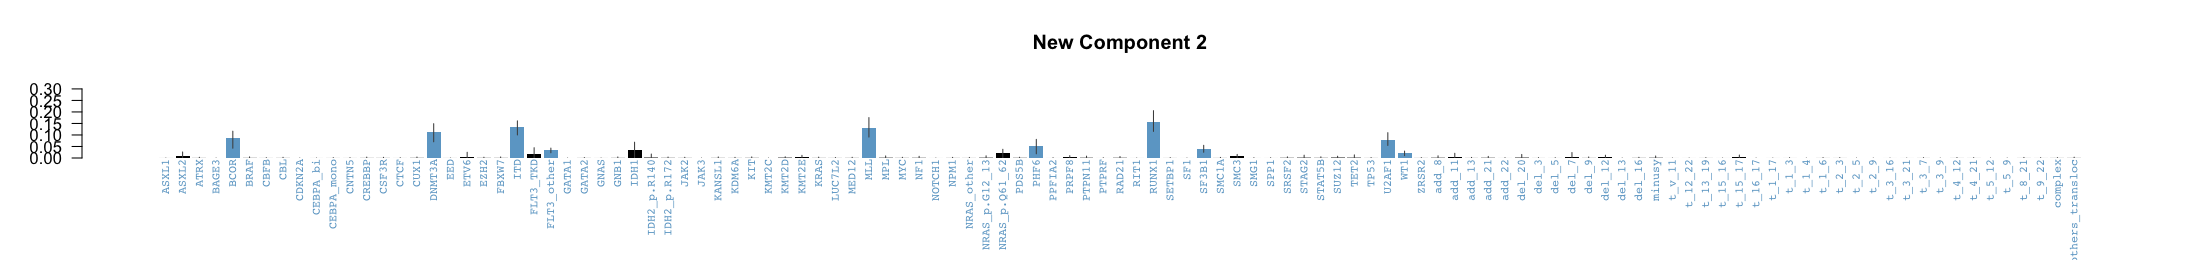

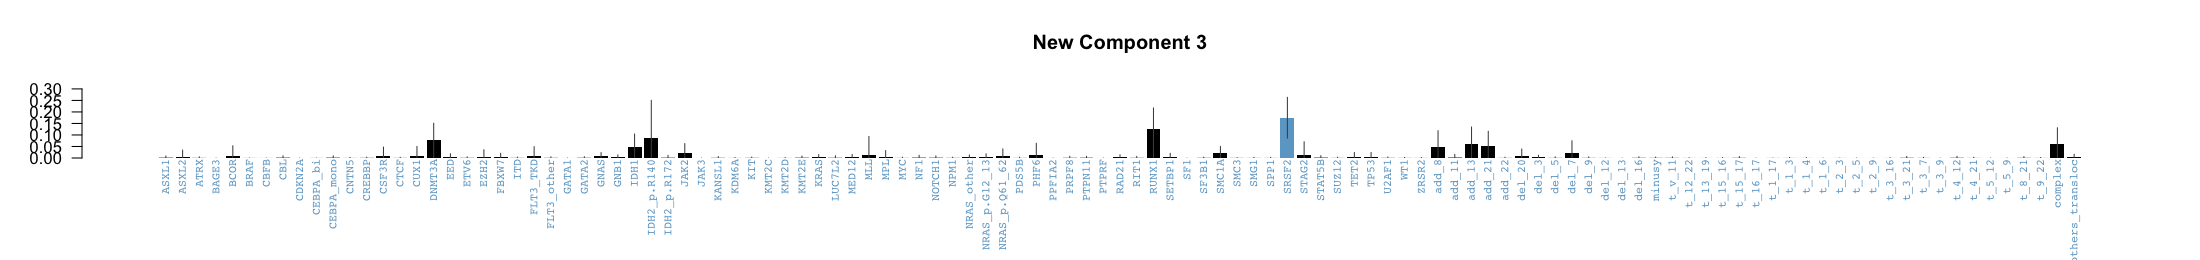

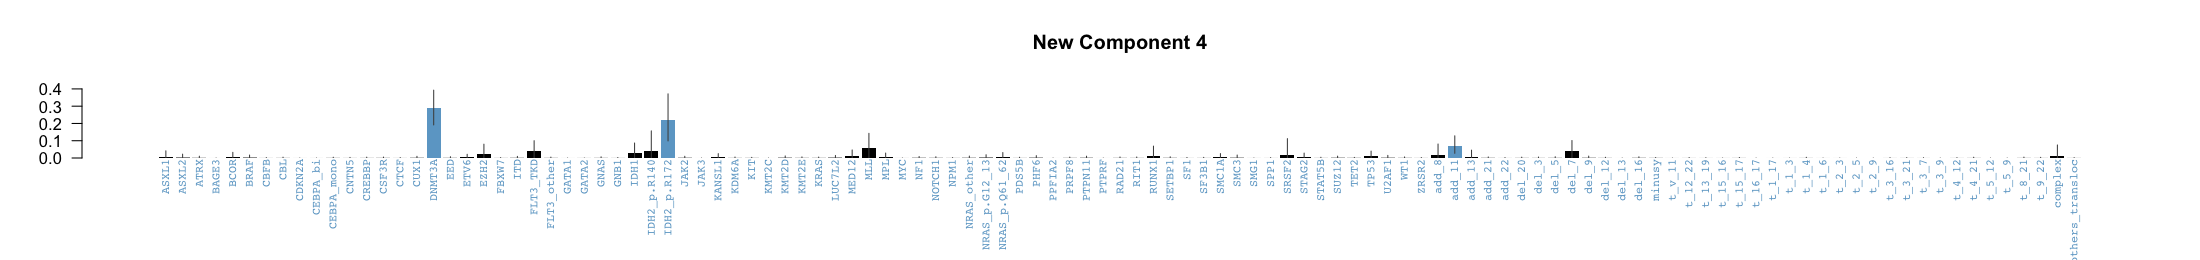

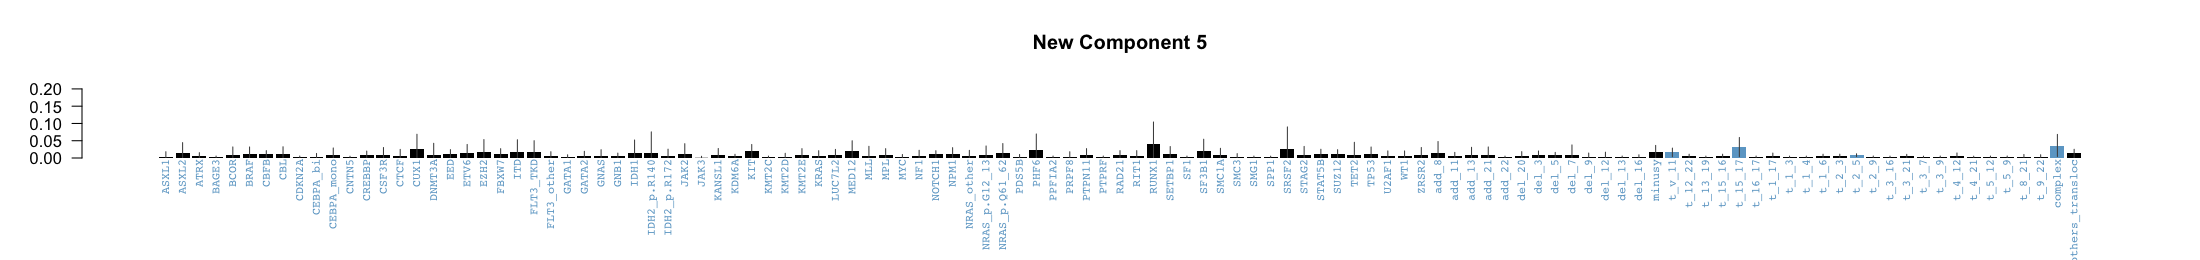

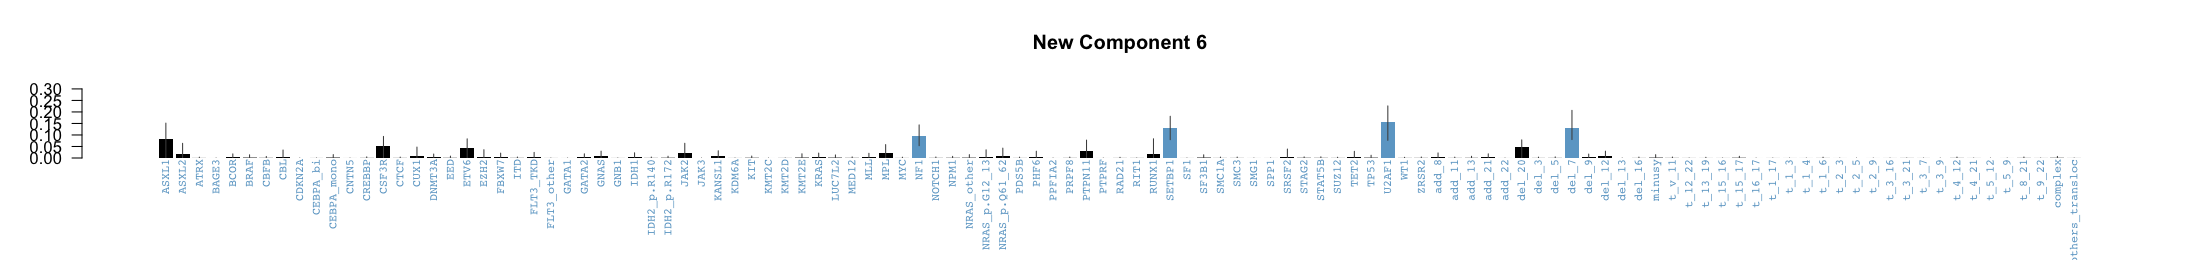

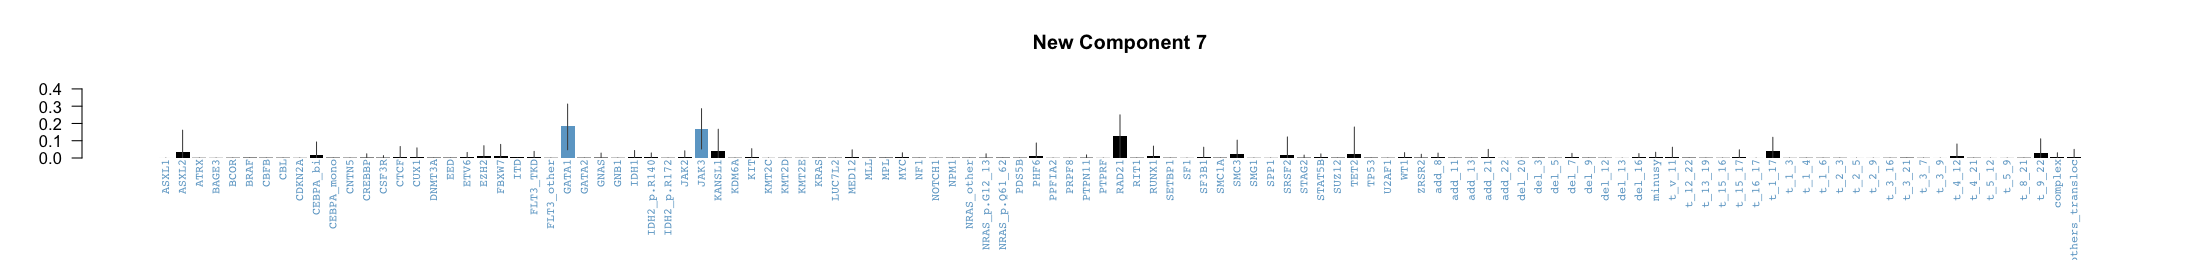

In [135]:
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black",
                    comp=1:7,
                    plot_title=c("New Component 1","New Component 2","New Component 3","New Component 4","New Component 5","New Component 6","New Component 7"))



Number of components: 7
Number of NA rows   : 0


values      count freq             
1  1           304   46.2006079027356 
2  2           170   25.8358662613982 
4  4            58   8.81458966565349 
3  3            52   7.90273556231003 
6  6            39   5.92705167173252 
5  5            30   4.55927051671733 
7  7             5   0.759878419452888
11 -- total -- 658   100%

notch went outside hinges. Try setting notch=FALSE.


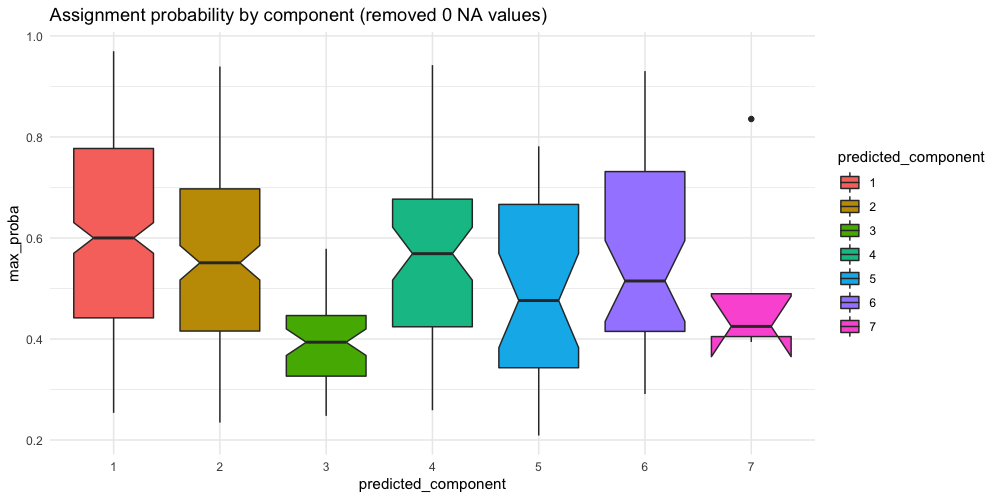

In [138]:
dd_predicted_recluster_7 <- get_prediction_result_dataframe(multi_output_recluster_7, df_to_recluster[colSums(df_to_recluster) > 0])
get_table(dd_predicted_recluster_7[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_recluster_7)

#Let's look at the repartition of initial component 0,2 and 4 in their new HDP Clustering : new component 1 to 7

In [141]:
df_10_component <- cbind(df_final, dd_predicted_10_components)
df_7_component <- df_10_component[df_10_component$predicted_component == 0 | df_10_component$predicted_component == 2 | df_10_component$predicted_component == 4 ,]
df_7_component$predicted_old_component <- df_7_component$predicted_component
df_7_component <- df_7_component['predicted_old_component']
df_7_component <- na.omit(df_7_component)
tmp <- cbind(df_7_component, dd_predicted_recluster_7['predicted_component'])

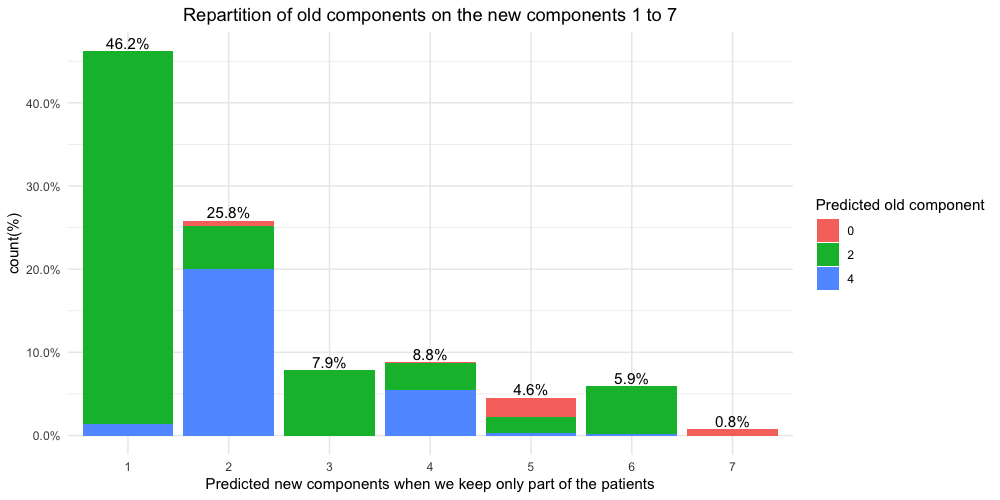

In [142]:
ggplot(tmp, aes(predicted_component)) +
geom_bar(aes(y = (..count..)/sum(..count..),fill=factor(predicted_old_component)))+
geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
scale_y_continuous(labels = percent) +
labs(x = "Predicted new components when we keep only part of the patients",title="Repartition of old components on the new components 1 to 7",fill="Predicted old component",y="count(%)")+
theme(plot.title = element_text(hjust = 0.5))

## Summary : 
#### We initially started with component 0 to 10 : C0 to C10 .
#### We removed component 0,2 and 4. It means that we now have C1 to C8 with C1 is initial component 1 , C2 is initial component 3, C3 is initial component 5 , C4 is initial component 6 , C5 initial
#### component 7, C6 initial component 8, C7 initial component 9 , C8 initial component 10.
#### On component 0,2 and 4 : we apply new HDP clustering (above) in order to create a repartition of those components into 7 new component (NC1 to NC7).
#### Therefore, we now have : C1 ... C8 and NC1 ... NC7

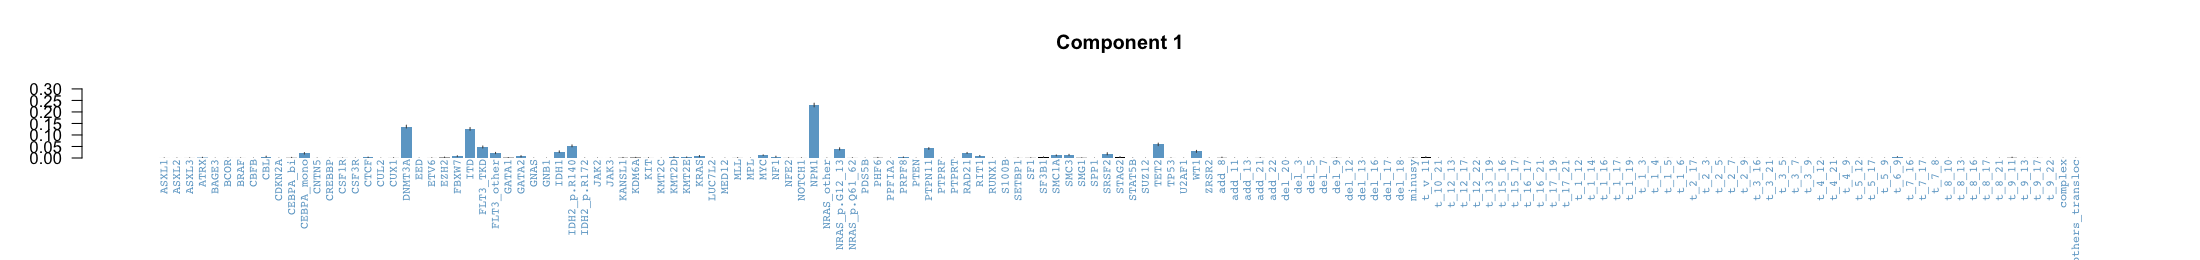

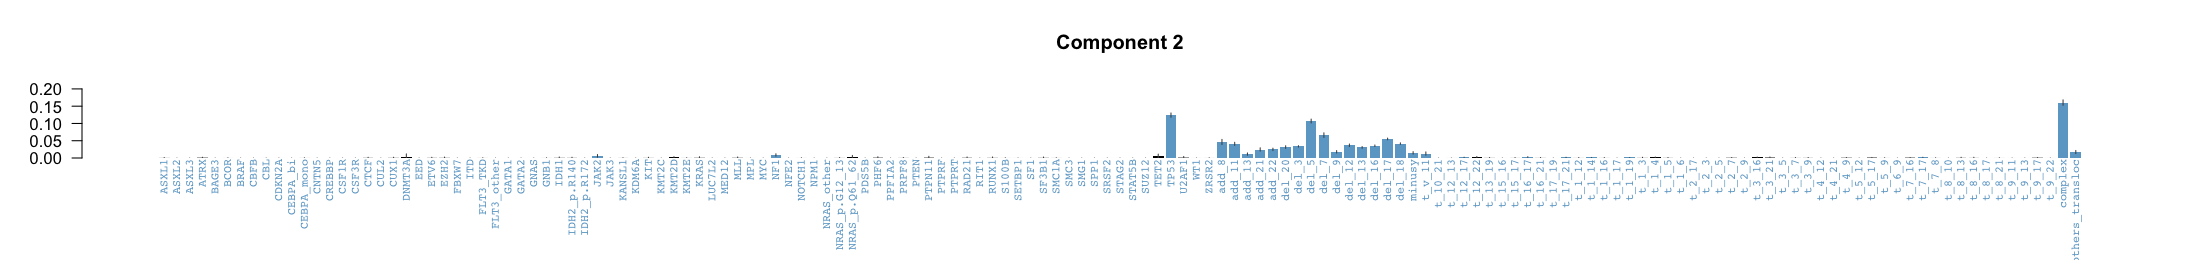

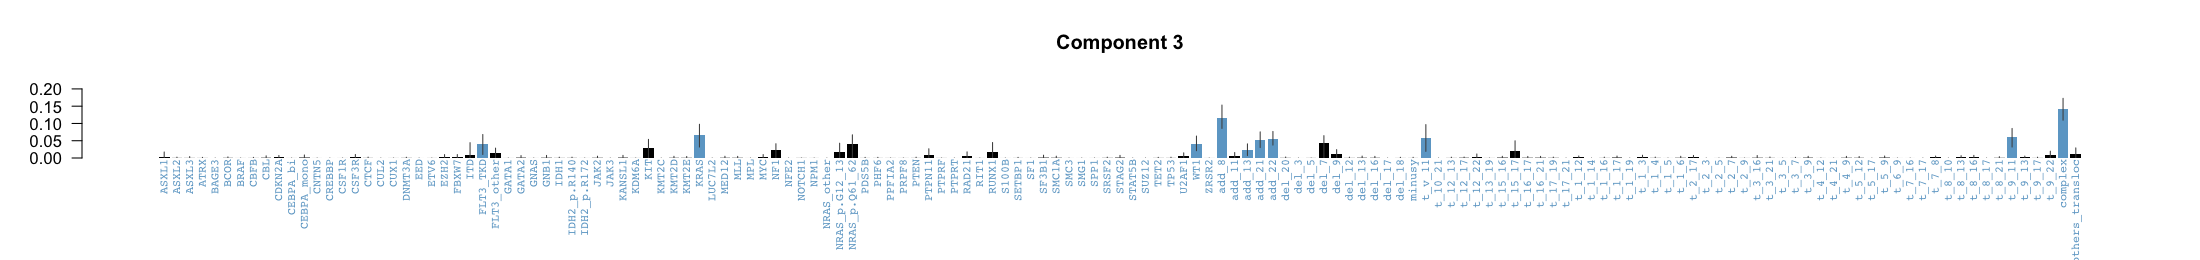

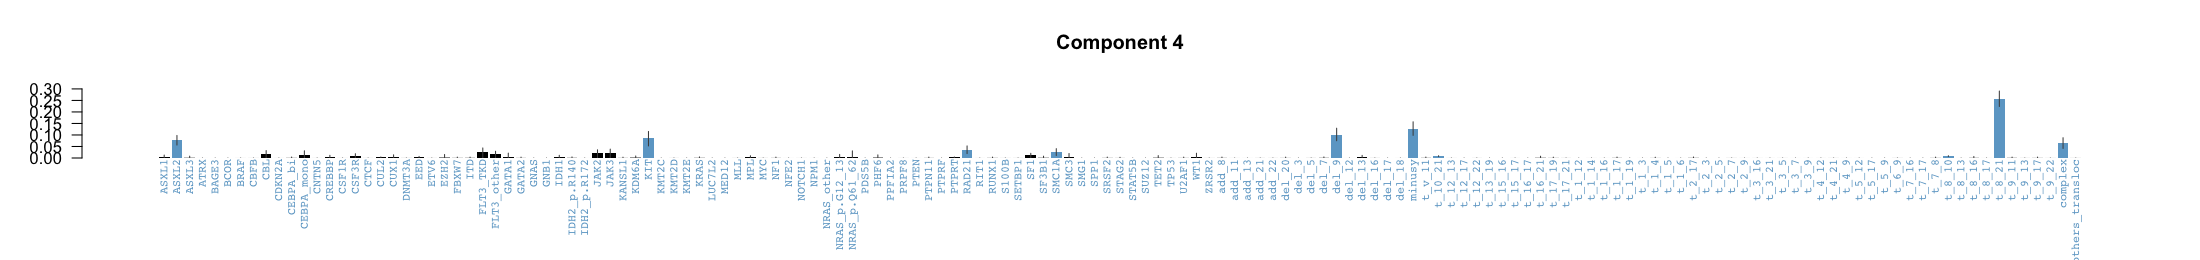

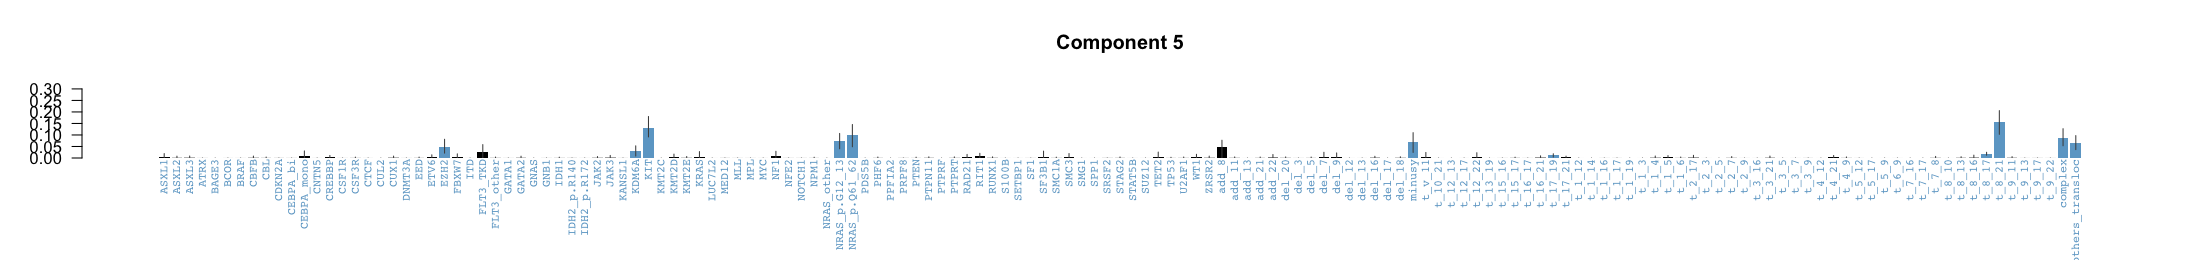

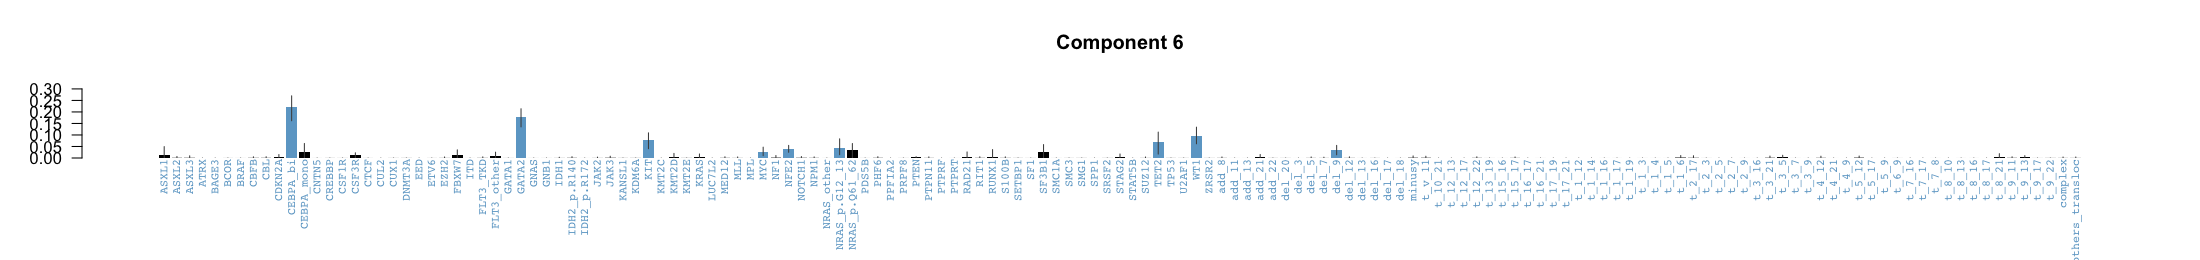

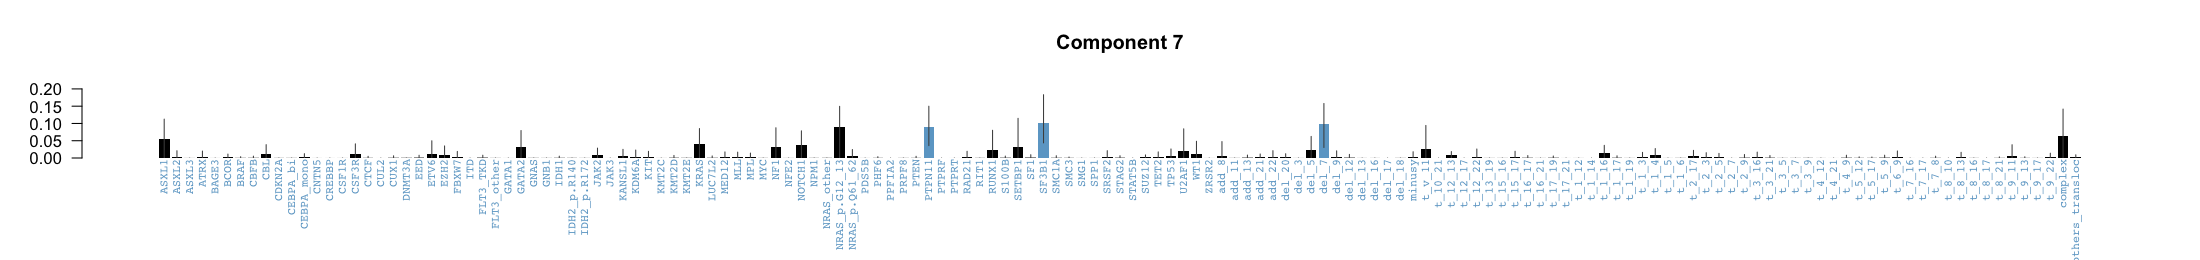

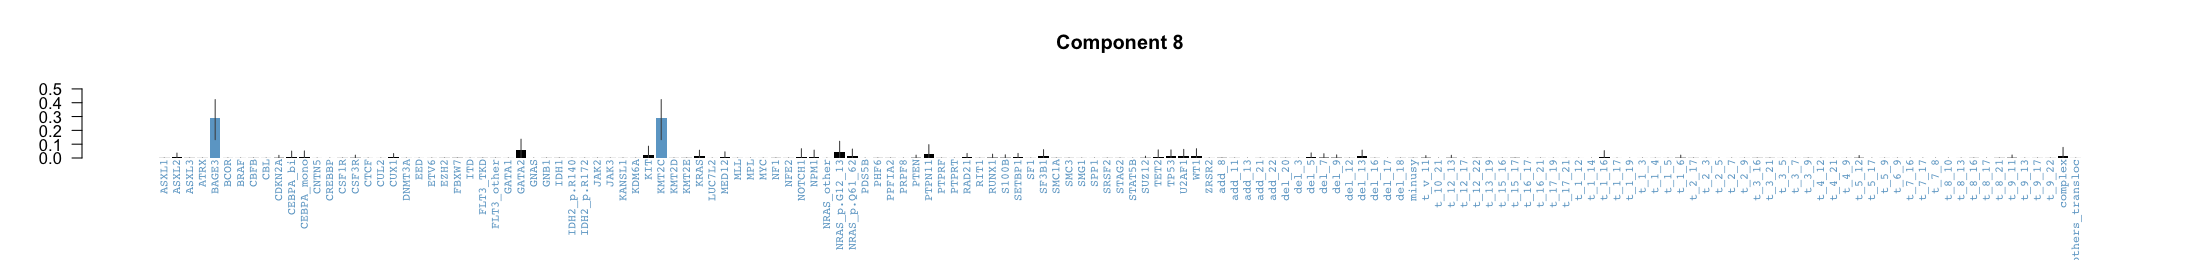

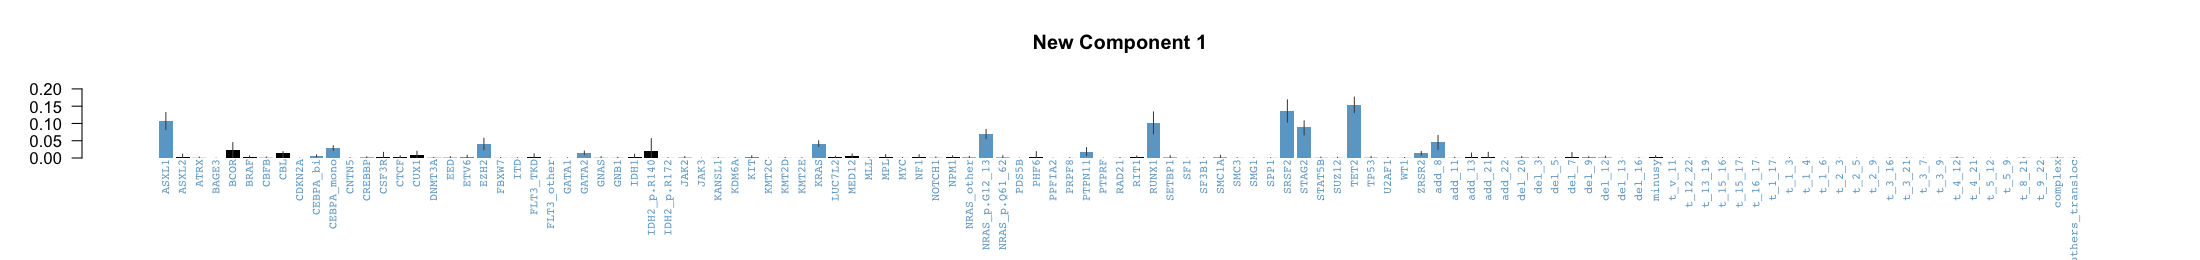

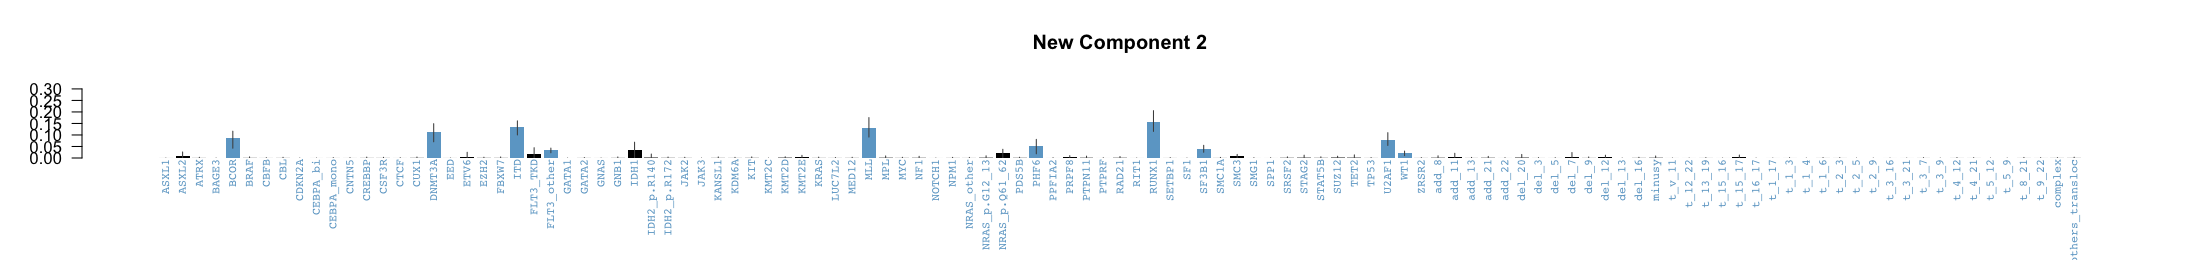

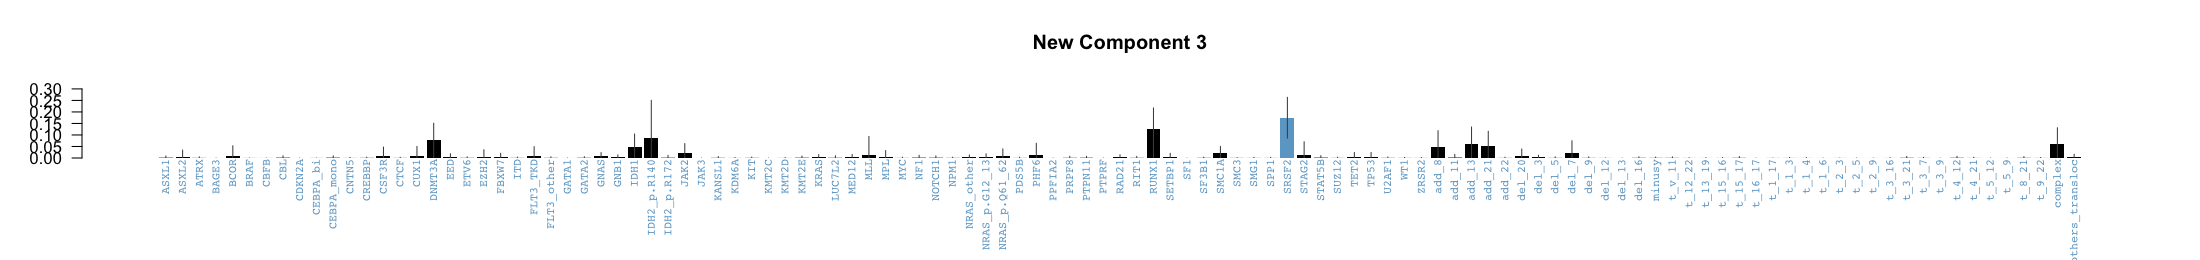

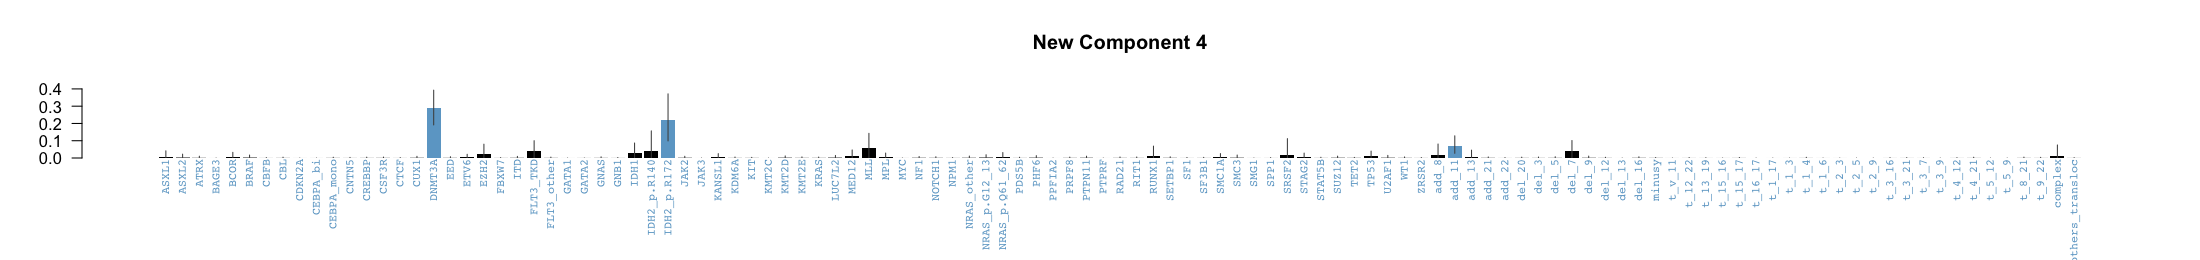

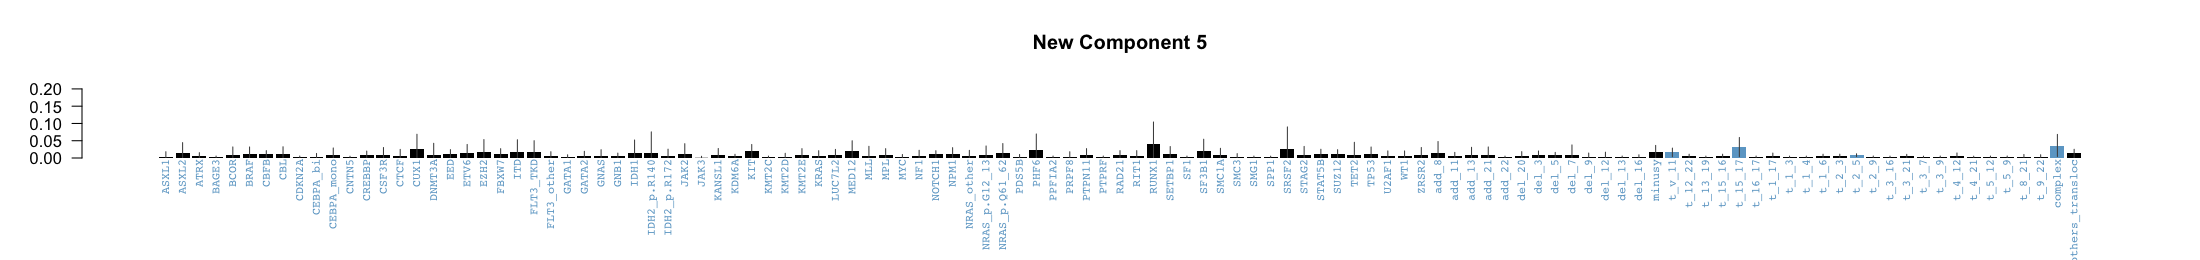

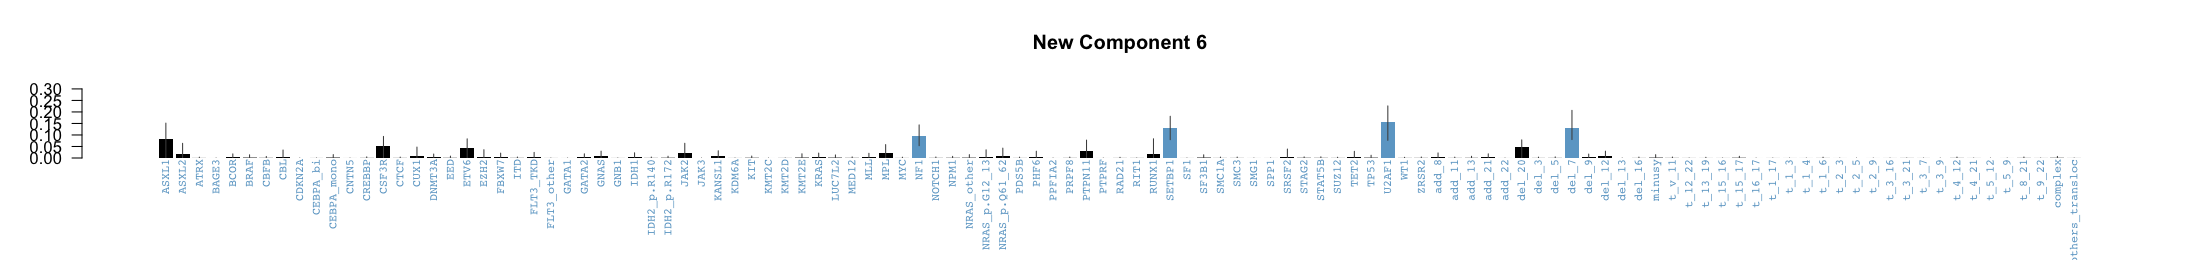

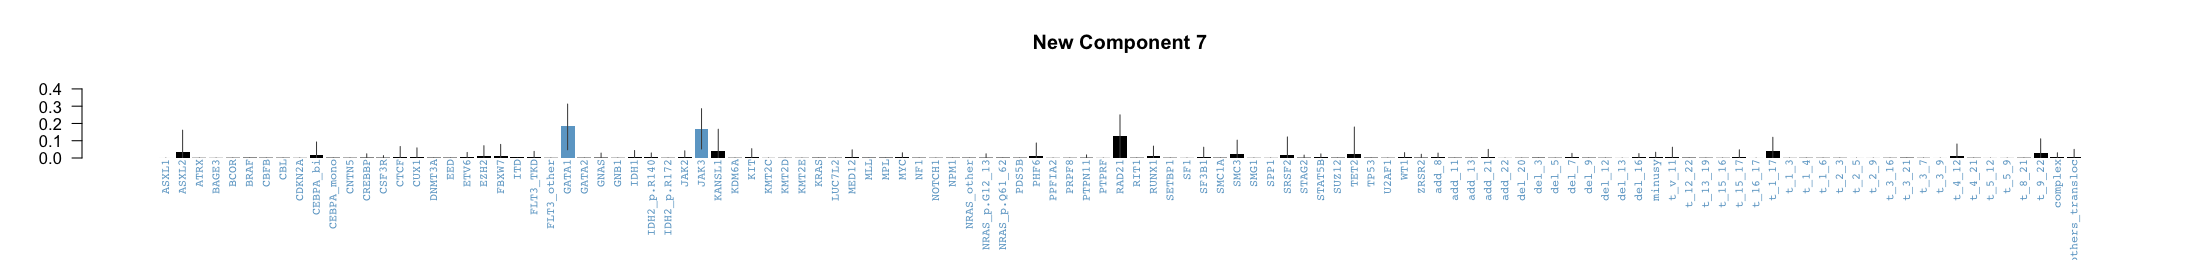

In [143]:
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                    comp=c(1,3,5,6,7,8,9,10),
                    plot_title=c("Component 1","Component 2","Component 3","Component 4","Component 5","Component 6","Component 7","Component 8")
                                         )
    plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black",
                    comp=1:7,
                    plot_title=c("New Component 1","New Component 2","New Component 3","New Component 4","New Component 5","New Component 6","New Component 7"))